In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [ ]:
data_path = '/content/drive/My Drive/Devanagari/Kp_Devanagari_final.csv'
df = pd.read_csv(data_path)

In [ ]:
# Filter out rows with missing or empty text
df_filtered = df[df['text'].notna() & (df['text'] != '')]

# Reset the index to make sure row IDs are consecutive from 0
df_filtered.reset_index(drop=True, inplace=True)

# Now df_filtered will have the row IDs as a sequential number starting from 0


In [ ]:
before_df = df_filtered[df_filtered['time_period'] == 'before_election']
after_df = df_filtered[df_filtered['time_period'] == 'after_election']

In [ ]:
df1= before_df['text']
df2= after_df['text']

In [3]:
import pandas as pd
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import numpy as np
import re
import spacy


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
#This splits all the sentences up which makes it easier for us to work with

all_sentences = []

for word in df1:
    all_sentences.append(word)

all_sentences
#df1 = df.to_string()

#df_split = df1.split()

#df_split
lines1 = list()
for line in all_sentences:
    words = line.split()
    for w in words:
       lines1.append(w)


print(lines1)

['कमेडी', 'सही', 'हो', 'केपी', 'बा', 'को', 'हलका', 'राम्रो', 'छ', 'साथीहरू', 'अरु', 'नेताको', 'भन्दा', 'दुर्गा', 'पर्शाई', 'चाहियो', 'सर।', 'नेपाल', 'मै', 'पैसा', 'त्रा', 'मुनिका', 'नेता', 'हरु', 'ले', 'काम', 'नगरेकै', 'हो', 'वस्\u200dतचार', 'मात्र', 'गेरे', 'केपी', 'ठिक्\u200dसा', 'अरु', 'वन्द', 'मेरो', 'बिचार', 'मा', '२०२२', 'लाडो', 'जस्तो', 'कुरा', 'गर्छ', 'पागल।', 'हाहाहा', 'रवि', 'लमेछाने', 'लाइ', 'जित्ने', 'भने', 'ने', '<br>नेपाली', 'हो', 'तमे', 'हारु', 'मुर्खा', 'हो', '!', '<br>फेरी', 'बुडा', 'ले', 'देश', 'दुबक्सा', '।', 'बकवास', 'धेराई', 'राम्रो', 'शेर', 'बद्र', 'देउवा', 'को', 'भरे', 'कैले', 'आउना???', 'तेस्मा', 'शामिल', 'हजर', 'पानी', 'xa', 'हो', 'ओली', 'बा', 'येलै', 'के', 'लविराको', 'छ', 'कि', 'येले', 'नेपाल', 'वाणी', 'देश', 'बनाइसक्यो', 'आबा', 'के', 'गरना', 'बाकी', 'छ....रा', 'यो', 'आबा', 'कलाकार', 'वैशाक्यो', 'वानी', 'सोचिरको', 'छ।', 'ekdamai', 'galaat...', 'full', 'of', 'bakwass', 'guff', 'mattrai', 'garirako', 'xa....', 'कस्तो', '2', 'घण्टाको', 'बर्बादी', 'र', '@FEhashtag

In [ ]:
import re

lines1 = [re.sub(r'[^अ-ह़\w]+', '', x) for x in lines1]

lines1_final = []

for word in lines1:
    if word != '':
        lines1_final.append(word)

print(lines1_final)


['कमड', 'सह', 'ह', 'कप', 'ब', 'क', 'हलक', 'रमर', 'छ', 'सथहर', 'अर', 'नतक', 'भनद', 'दरग', 'परशई', 'चहय', 'सर', 'नपल', 'म', 'पस', 'तर', 'मनक', 'नत', 'हर', 'ल', 'कम', 'नगरक', 'ह', 'वसतचर', 'मतर', 'गर', 'कप', 'ठकस', 'अर', 'वनद', 'मर', 'बचर', 'म', '२०२२', 'लड', 'जसत', 'कर', 'गरछ', 'पगल', 'हहह', 'रव', 'लमछन', 'लइ', 'जतन', 'भन', 'न', 'brनपल', 'ह', 'तम', 'हर', 'मरख', 'ह', 'brफर', 'बड', 'ल', 'दश', 'दबकस', 'बकवस', 'धरई', 'रमर', 'शर', 'बदर', 'दउव', 'क', 'भर', 'कल', 'आउन', 'तसम', 'शमल', 'हजर', 'पन', 'xa', 'ह', 'ओल', 'ब', 'यल', 'क', 'लवरक', 'छ', 'क', 'यल', 'नपल', 'वण', 'दश', 'बनइसकय', 'आब', 'क', 'गरन', 'बक', 'छर', 'य', 'आब', 'कलकर', 'वशकय', 'वन', 'सचरक', 'छ', 'ekdamai', 'galaat', 'full', 'of', 'bakwass', 'guff', 'mattrai', 'garirako', 'xa', 'कसत', '2', 'घणटक', 'बरबद', 'र', 'FEhashtag', 'बर', 'कपय', 'कमतम', 'एक', 'पटक', 'सचनहस', 'य', 'मरख', 'कनटसहर', 'तपइक', 'सटडयम', 'लयउन', 'अघ', 'क', 'छ', 'रमर', 'कर', 'गरय', 'जस', 'लगय', 'तपइ', 'लइभल', 'पन', 'गफ', 'गरय', 'न', 'तर', 'आफन', 'कर', 'नयम', 'म', 'अडन', 

In [ ]:
nepali_stop_words = {
    'हो', 'को', 'र', 'यो', 'छ', 'पनि', 'के', 'कुरा', 'त', 'एक', 'म', 'उहाँ', 'तिमी', 'गर्ने'
    'हामी', 'तिमीहरू', 'हामीहरू', 'उसको', 'उनी', 'तिनी', 'माथि', 'नीचे', 'आदि', 'मात्र', 'तर','लाई', 'देश', 'ले', 'मा', 'अब', 'नै', 'जनता', 'काम', 'नेपाल', 'अनि', 'वर्ष', 'हुन', 'हो', 'भएको', 'थियो', 'के', 'तपाईं', 'साथ', 'कुरा', 'यो', 'उहाँ', 'छ', 'र', 'हो', 'पनि', 'गर्दैन', 'हरु', '।' }

# Remove stop words
stem1 = [word for word in lines1_final if word not in nepali_stop_words]

print(stem1)

['कमड', 'सह', 'ह', 'कप', 'ब', 'क', 'हलक', 'रमर', 'सथहर', 'अर', 'नतक', 'भनद', 'दरग', 'परशई', 'चहय', 'सर', 'नपल', 'पस', 'मनक', 'नत', 'हर', 'ल', 'कम', 'नगरक', 'ह', 'वसतचर', 'मतर', 'गर', 'कप', 'ठकस', 'अर', 'वनद', 'मर', 'बचर', '२०२२', 'लड', 'जसत', 'कर', 'गरछ', 'पगल', 'हहह', 'रव', 'लमछन', 'लइ', 'जतन', 'भन', 'न', 'brनपल', 'ह', 'तम', 'हर', 'मरख', 'ह', 'brफर', 'बड', 'ल', 'दश', 'दबकस', 'बकवस', 'धरई', 'रमर', 'शर', 'बदर', 'दउव', 'क', 'भर', 'कल', 'आउन', 'तसम', 'शमल', 'हजर', 'पन', 'xa', 'ह', 'ओल', 'ब', 'यल', 'क', 'लवरक', 'क', 'यल', 'नपल', 'वण', 'दश', 'बनइसकय', 'आब', 'क', 'गरन', 'बक', 'छर', 'य', 'आब', 'कलकर', 'वशकय', 'वन', 'सचरक', 'ekdamai', 'galaat', 'full', 'of', 'bakwass', 'guff', 'mattrai', 'garirako', 'xa', 'कसत', '2', 'घणटक', 'बरबद', 'FEhashtag', 'बर', 'कपय', 'कमतम', 'पटक', 'सचनहस', 'य', 'मरख', 'कनटसहर', 'तपइक', 'सटडयम', 'लयउन', 'अघ', 'क', 'रमर', 'कर', 'गरय', 'जस', 'लगय', 'तपइ', 'लइभल', 'पन', 'गफ', 'गरय', 'न', 'आफन', 'कर', 'नयम', 'अडन', 'नसकन', 'क', 'दश', 'चलकसमरखल', 'भरएकएकदम', 'कर', 'ल', 'तनक

In [ ]:
!apt-get install -y fonts-noto

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-noto-cjk fonts-noto-cjk-extra fonts-noto-color-emoji fonts-noto-core fonts-noto-extra
  fonts-noto-mono fonts-noto-ui-core fonts-noto-ui-extra fonts-noto-unhinted
The following NEW packages will be installed:
  fonts-noto fonts-noto-cjk fonts-noto-cjk-extra fonts-noto-color-emoji fonts-noto-core
  fonts-noto-extra fonts-noto-mono fonts-noto-ui-core fonts-noto-ui-extra fonts-noto-unhinted
0 upgraded, 10 newly installed, 0 to remove and 49 not upgraded.
Need to get 317 MB of archives.
After this operation, 789 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 fonts-noto-core all 20201225-1build1 [12.2 MB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-noto all 20201225-1build1 [16.8 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 fonts-noto-cjk all 1:2022

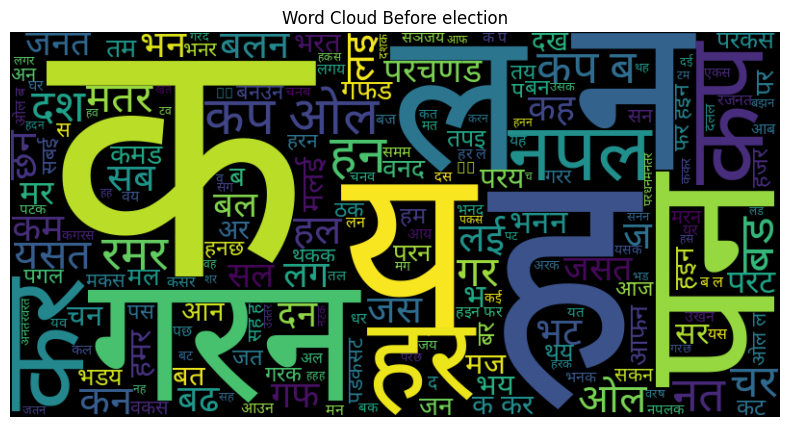

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Set up Noto Sans Devanagari font globally
import matplotlib as mpl
mpl.rcParams['font.family'] = 'Noto Sans Devanagari'

# List of random Nepali words
nepali_words = stem1

# Create a string of all words
word_string = " ".join(nepali_words)

# Create a word cloud using the string of Nepali words
wordcloud = WordCloud(font_path="/usr/share/fonts/truetype/noto/NotoSansDevanagari-Regular.ttf",
                      width=800, height=400).generate(word_string)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Before election')
plt.show()

In [ ]:
#This splits all the sentences up which makes it easier for us to work with

all_sentences = []

for word in df2:
    all_sentences.append(word)

all_sentences
#df1 = df.to_string()

#df_split = df1.split()

#df_split
lines2 = list()
for line in all_sentences:
    words = line.split()
    for w in words:
       lines2.append(w)


print(lines2)

['यो', 'त', 'सबाई', 'नेपाली', 'युवा', 'हरु', 'ले', 'ढेरै', 'देखी', 'चाहेको', 'कुरा', 'हो', 'काले', 'काले', 'मिलेक्स', 'अब', 'भले', 'को', 'कल', 'कम्बोडिया', 'किन...लगानी..सरबजानिक', 'नगरिदिनु', 'होला', 'वान्ना', 'सिस्ताता', 'बिगेर्नी', 'गुरु', 'तारा', 'रवि', 'लाइ', 'योजना', 'पूर्वक', 'फसाइको', 'हो', 'यो', 'स्वार्थ', 'लुकेको', 'छ', 'रवि', 'निर्दोष', 'छ', 'जय', 'घंटा', 'रवि', 'निर्दोष', 'छ', 'अझै', 'प्रमद', 'खोज्नु', 'होला।', '<br><br>', 'सलाम', 'दलाल', 'घिमिरे', 'दरायो', 'मुलासाग', 'हारु', 'यो', 'चोर', 'हरु', 'ले', 'वयेको', 'देस', 'मा', 'चोर', 'नेता', 'आफनै', 'नाच्नु', 'धुँझौ', 'व्याको', 'छ', 'साधरण', 'जनता', 'ले', 'आज', 'मर्नु', 'पर्ने', 'कटि', 'हो', 'चोर<br>', 'कुकुर', 'यो', 'घफडिलै', 'देश', 'निखला', 'गार्नु', 'परक्सा', 'वाह', 'रुनु', 'किना', 'होइना', 'तेल', 'ले', 'त', 'पाटक', 'पताक', 'ईश्वर', 'शब्द', 'जानी', 'बुझी', 'छोड्दा', 'पानी', 'कोही', 'नेता', 'न', 'मिडिया', 'बोल्दाना', 'डिल्लरामपुर', 'रबि', 'लै', 'जंगली', 'कुकुर', 'लेजस्तो', 'खेडाको', 'खेदेकै', 'छ', 'आबा', 'हजुर', 'लाइ', 'ओनी',

In [ ]:
import re

lines2 = [re.sub(r'[^अ-ह़\w]+', '', x) for x in lines2]

lines2_final = []

for word in lines2:
    if word != '':
        lines2_final.append(word)

print(lines2_final)


['य', 'त', 'सबई', 'नपल', 'यव', 'हर', 'ल', 'ढर', 'दख', 'चहक', 'कर', 'ह', 'कल', 'कल', 'मलकस', 'अब', 'भल', 'क', 'कल', 'कमबडय', 'कनलगनसरबजनक', 'नगरदन', 'हल', 'वनन', 'ससतत', 'बगरन', 'गर', 'तर', 'रव', 'लइ', 'यजन', 'परवक', 'फसइक', 'ह', 'य', 'सवरथ', 'लकक', 'छ', 'रव', 'नरदष', 'छ', 'जय', 'घट', 'रव', 'नरदष', 'छ', 'अझ', 'परमद', 'खजन', 'हल', 'brbr', 'सलम', 'दलल', 'घमर', 'दरय', 'मलसग', 'हर', 'य', 'चर', 'हर', 'ल', 'वयक', 'दस', 'म', 'चर', 'नत', 'आफन', 'नचन', 'धझ', 'वयक', 'छ', 'सधरण', 'जनत', 'ल', 'आज', 'मरन', 'परन', 'कट', 'ह', 'चरbr', 'ककर', 'य', 'घफडल', 'दश', 'नखल', 'गरन', 'परकस', 'वह', 'रन', 'कन', 'हइन', 'तल', 'ल', 'त', 'पटक', 'पतक', 'ईशवर', 'शबद', 'जन', 'बझ', 'छडद', 'पन', 'कह', 'नत', 'न', 'मडय', 'बलदन', 'डललरमपर', 'रब', 'ल', 'जगल', 'ककर', 'लजसत', 'खडक', 'खदक', 'छ', 'आब', 'हजर', 'लइ', 'ओन', 'सर', 'भय', 'छ', 'a', 'hrefhttpwwwyoutubecomresultssearch_query23balenkojayhosbalenkojayhosa', 'कपल', 'कत', 'हर', 'सट', 'नच', 'गर', 'फस', 'बक', 'म', 'दखकसन', 'अब', 'नबजबक', 'परधन', 'मतर', 'हनसन', 'यस', 'नत', 'लए',

In [ ]:
nepali_stop_words = {
    'हो', 'को', 'र', 'यो', 'छ', 'पनि', 'के', 'कुरा', 'त', 'एक', 'म', 'उहाँ', 'तिमी', 'गर्ने'
    'हामी', 'तिमीहरू', 'हामीहरू', 'उसको', 'उनी', 'तिनी', 'माथि', 'नीचे', 'आदि', 'मात्र', 'तर','लाई', 'देश', 'ले', 'मा', 'अब', 'नै', 'जनता', 'काम', 'नेपाल', 'अनि', 'वर्ष', 'हुन', 'हो', 'भएको', 'थियो', 'के', 'तपाईं', 'साथ', 'कुरा', 'यो', 'उहाँ', 'छ', 'र', 'हो', 'पनि', 'गर्दैन', 'हरु', '।' }

# Remove stop words
stem2 = [word for word in lines2_final if word not in nepali_stop_words]

print(stem2)

['य', 'सबई', 'नपल', 'यव', 'हर', 'ल', 'ढर', 'दख', 'चहक', 'कर', 'ह', 'कल', 'कल', 'मलकस', 'भल', 'क', 'कल', 'कमबडय', 'कनलगनसरबजनक', 'नगरदन', 'हल', 'वनन', 'ससतत', 'बगरन', 'गर', 'रव', 'लइ', 'यजन', 'परवक', 'फसइक', 'ह', 'य', 'सवरथ', 'लकक', 'रव', 'नरदष', 'जय', 'घट', 'रव', 'नरदष', 'अझ', 'परमद', 'खजन', 'हल', 'brbr', 'सलम', 'दलल', 'घमर', 'दरय', 'मलसग', 'हर', 'य', 'चर', 'हर', 'ल', 'वयक', 'दस', 'चर', 'नत', 'आफन', 'नचन', 'धझ', 'वयक', 'सधरण', 'जनत', 'ल', 'आज', 'मरन', 'परन', 'कट', 'ह', 'चरbr', 'ककर', 'य', 'घफडल', 'दश', 'नखल', 'गरन', 'परकस', 'वह', 'रन', 'कन', 'हइन', 'तल', 'ल', 'पटक', 'पतक', 'ईशवर', 'शबद', 'जन', 'बझ', 'छडद', 'पन', 'कह', 'नत', 'न', 'मडय', 'बलदन', 'डललरमपर', 'रब', 'ल', 'जगल', 'ककर', 'लजसत', 'खडक', 'खदक', 'आब', 'हजर', 'लइ', 'ओन', 'सर', 'भय', 'a', 'hrefhttpwwwyoutubecomresultssearch_query23balenkojayhosbalenkojayhosa', 'कपल', 'कत', 'हर', 'सट', 'नच', 'गर', 'फस', 'बक', 'दखकसन', 'नबजबक', 'परधन', 'मतर', 'हनसन', 'यस', 'नत', 'लए', 'रप', 'लखन', 'छछ', 'हरदक', 'शरदधञजल', 'ह', 'हमर', 'बबस', 'ल', 'मरर'

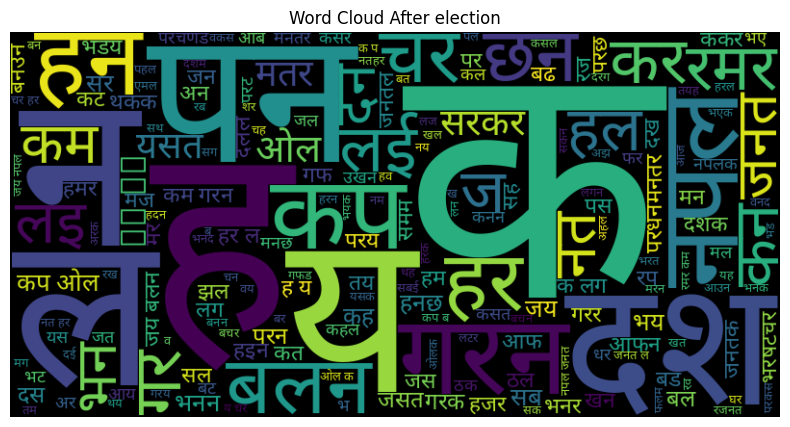

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Set up Noto Sans Devanagari font globally
import matplotlib as mpl
mpl.rcParams['font.family'] = 'Noto Sans Devanagari'

# List of random Nepali words
nepali_words = stem2

# Create a string of all words
word_string = " ".join(nepali_words)

# Create a word cloud using the string of Nepali words
wordcloud = WordCloud(font_path="/usr/share/fonts/truetype/noto/NotoSansDevanagari-Regular.ttf",
                      width=800, height=400).generate(word_string)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud After election')
plt.show()

**SENTIMENTAL ANALYSIS**

In [ ]:
df = pd.read_csv(data_path)

In [ ]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("text-classification", model="dpkrm/NepaliSentimentAnalysis")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/881 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/366 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

Device set to use cpu


In [ ]:
# Filter out rows with missing or empty text
df_filtered = df[df['text'].notna() & (df['text'] != '')]

# Reset the index to make sure row IDs are consecutive from 0
df_filtered.reset_index(drop=True, inplace=True)

# Now df_filtered will have the row IDs as a sequential number starting from 0


In [ ]:
df_filtered

,video_id,author,published_at,like_count,text,time_period,script
0,g0uRUd2WN4c,@somgurung8139,2022-11-13 21:49:35,0.0,कमेडी सही हो,before_election,Devanagari
1,AQt_hQ--XwU,@tejendrasalami9316,2022-11-28 02:06:04,2.0,केपी बा को हलका राम्रो छ साथीहरू अरु नेताको भन्दा,before_election,Devanagari
2,x90ZXr6DD-c,@swipegamingff1320,2022-10-05 04:16:50,13.0,दुर्गा पर्शाई चाहियो सर।,before_election,Devanagari
3,55oY6NA8DSY,@dsrai3358,2022-10-21 02:13:07,1.0,नेपाल मै पैसा त्रा मुनिका नेता हरु ले काम नगरे...,before_election,Devanagari
4,2FJLO13aRS0,@sonamsubba9444,2022-03-23 01:37:07,1.0,२०२२,before_election,Devanagari
...,...,...,...,...,...,...,...
3388,fxod58WDCI4,@kajishrestha418,2024-11-01 14:04:28,0.0,गफ नगरौ काम गरौ,after_election,Devanagari
3389,2YvdNxnuZKc,@GorakhRawat-d7y,2024-10-20 15:53:56,1.0,घन्टा गरि रबि दाइ कोई पछि लागेको छै,after_election,Devanagari
3390,sLbgM3VA53I,@narayankhanal2985,2024-08-17 12:22:13,0.0,🎉 रविजी तपाइलाइ यो सरकारले चिनेन किनकी नागरिकत...,after_election,Devanagari
3391,p9wCood69gg,@chesszone9665,2024-07-22 15:50:38,4.0,जन आन्दोलनबाट पिडितहरुको न्यायोचित ढंगले समाधा...,after_election,Devanagari


In [ ]:
# Example prediction logic with truncation
df_filtered['sentiment_label'] = None  # Initialize a new column for sentiment labels with None
df_filtered['confidence_score'] = None  # Initialize a new column for confidence scores with None

for i, text in enumerate(df_filtered['text']):  # Assuming 'text' is the column with the content
    result = pipe(text, truncation=True, padding=True, max_length=512)[0]  # Truncate and pad to 512 tokens
    df_filtered.at[i, 'sentiment_label'] = result['label']
    df_filtered.at[i, 'confidence_score'] = result['score']

# Display the updated DataFrame
print(df_filtered[['text', 'sentiment_label', 'confidence_score']].head())


<ipython-input-28-a5bc6cfc2f9d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['sentiment_label'] = None  # Initialize a new column for sentiment labels with None
<ipython-input-28-a5bc6cfc2f9d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['confidence_score'] = None  # Initialize a new column for confidence scores with None


                                                text sentiment_label  \
0                                       कमेडी सही हो         LABEL_2   
1  केपी बा को हलका राम्रो छ साथीहरू अरु नेताको भन्दा         LABEL_0   
2                           दुर्गा पर्शाई चाहियो सर।         LABEL_0   
3  नेपाल मै पैसा त्रा मुनिका नेता हरु ले काम नगरे...         LABEL_0   
4                                               २०२२         LABEL_0   

  confidence_score  
0         0.996508  
1         0.999866  
2         0.700631  
3         0.999919  
4         0.893962  


In [ ]:
# Map the sentiment labels to corresponding names
label_mapping = {
    'LABEL_0': 'negative',
    'LABEL_1': 'positive',
    'LABEL_2': 'neutral'
}

# Apply the mapping to the 'sentiment_label' column
df_filtered['sentiment_label'] = df_filtered['sentiment_label'].map(label_mapping)

# Display the updated DataFrame
print(df_filtered[['text', 'sentiment_label', 'confidence_score']].head())


                                                text sentiment_label  \
0                                       कमेडी सही हो         neutral   
1  केपी बा को हलका राम्रो छ साथीहरू अरु नेताको भन्दा        negative   
2                           दुर्गा पर्शाई चाहियो सर।        negative   
3  नेपाल मै पैसा त्रा मुनिका नेता हरु ले काम नगरे...        negative   
4                                               २०२२        negative   

  confidence_score  
0         0.996508  
1         0.999866  
2         0.700631  
3         0.999919  
4         0.893962  


<ipython-input-31-a3863f4511b9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['sentiment_label'] = df_filtered['sentiment_label'].map(label_mapping)


In [ ]:
#df_filtered.to_csv('/content/drive/My Drive/merged_data_sentiment_Kp.csv', index=False)

,video_id,author,published_at,like_count,text,time_period,script,sentiment_label,confidence_score
0,g0uRUd2WN4c,@somgurung8139,2022-11-13 21:49:35,0.0,कमेडी सही हो,before_election,Devanagari,neutral,0.996508
1,AQt_hQ--XwU,@tejendrasalami9316,2022-11-28 02:06:04,2.0,केपी बा को हलका राम्रो छ साथीहरू अरु नेताको भन्दा,before_election,Devanagari,negative,0.999866
2,x90ZXr6DD-c,@swipegamingff1320,2022-10-05 04:16:50,13.0,दुर्गा पर्शाई चाहियो सर।,before_election,Devanagari,negative,0.700631
3,55oY6NA8DSY,@dsrai3358,2022-10-21 02:13:07,1.0,नेपाल मै पैसा त्रा मुनिका नेता हरु ले काम नगरे...,before_election,Devanagari,negative,0.999919
4,2FJLO13aRS0,@sonamsubba9444,2022-03-23 01:37:07,1.0,२०२२,before_election,Devanagari,negative,0.893962
...,...,...,...,...,...,...,...,...,...
3388,fxod58WDCI4,@kajishrestha418,2024-11-01 14:04:28,0.0,गफ नगरौ काम गरौ,after_election,Devanagari,neutral,0.697656
3389,2YvdNxnuZKc,@GorakhRawat-d7y,2024-10-20 15:53:56,1.0,घन्टा गरि रबि दाइ कोई पछि लागेको छै,after_election,Devanagari,positive,0.998954
3390,sLbgM3VA53I,@narayankhanal2985,2024-08-17 12:22:13,0.0,🎉 रविजी तपाइलाइ यो सरकारले चिनेन किनकी नागरिकत...,after_election,Devanagari,positive,0.999018
3391,p9wCood69gg,@chesszone9665,2024-07-22 15:50:38,4.0,जन आन्दोलनबाट पिडितहरुको न्यायोचित ढंगले समाधा...,after_election,Devanagari,positive,0.999127


In [5]:
#df_filtered = pd.read_csv('/content/drive/My Drive/merged_data_sentiment_Kp.csv')

In [6]:
# Assuming 'time_period' is a column in your DataFrame and contains 'before_election' and 'after_election'
# and 'sentiment_label' contains the sentiment labels ('positive', 'negative', 'neutral')

# Filter for before_election and after_election
before_election_df = df_filtered[df_filtered['time_period'] == 'before_election']
after_election_df = df_filtered[df_filtered['time_period'] == 'after_election']

# Count sentiment labels for before_election
before_election_counts = before_election_df['sentiment_label'].value_counts()

# Count sentiment labels for after_election
after_election_counts = after_election_df['sentiment_label'].value_counts()

# Display the counts
print("Sentiment counts before election:")
print(before_election_counts)

print("\nSentiment counts after election:")
print(after_election_counts)


Sentiment counts before election:
sentiment_label
negative    668
neutral     405
positive    306
Name: count, dtype: int64

Sentiment counts after election:
sentiment_label
negative    920
neutral     584
positive    510
Name: count, dtype: int64


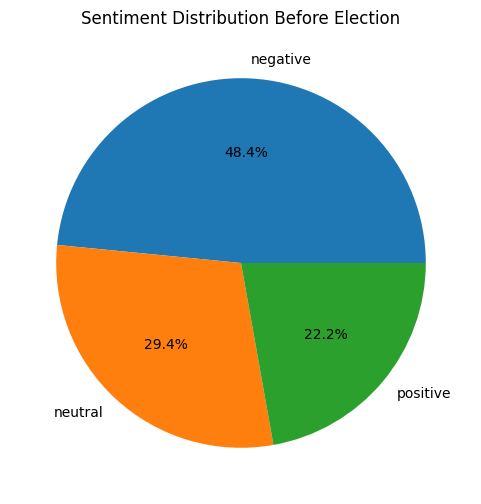

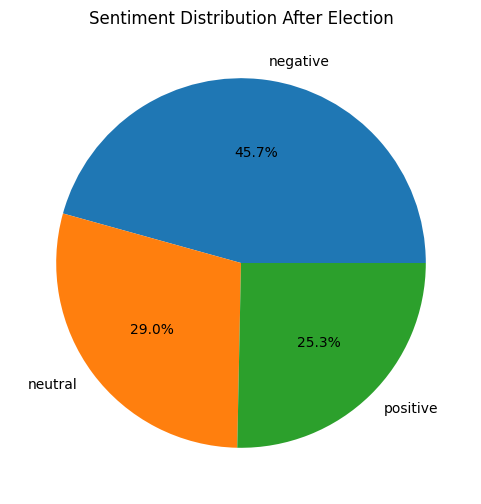

In [7]:
import matplotlib.pyplot as plt

# Plot the pie chart for before election
plt.figure(figsize=(6, 6))
before_election_counts.plot(kind='pie', autopct='%1.1f%%', labels=before_election_counts.index)
plt.title('Sentiment Distribution Before Election')
plt.ylabel('')  # Remove the label for better visualization
plt.show()

# Plot the pie chart for after election
plt.figure(figsize=(6, 6))
after_election_counts.plot(kind='pie', autopct='%1.1f%%', labels=after_election_counts.index)
plt.title('Sentiment Distribution After Election')
plt.ylabel('')  # Remove the label for better visualization
plt.show()


In [8]:
# Define a list of Nepali stopwords 
nepali_stopwords = [
    'हो', 'को', 'र', 'यो', 'छ', 'पनि', 'के', 'कुरा', 'त', 'एक', 'म', 'उहाँ', 'तिमी', 'गर्ने'
    'हामी', 'तिमीहरू', 'हामीहरू', 'उसको', 'उनी', 'तिनी', 'माथि', 'नीचे', 'आदि', 'मात्र', 'तर','लाई', 'देश', 'ले', 'मा', 'अब', 'नै', 'जनता', 'काम', 'नेपाल', 'अनि', 'वर्ष', 'हुन', 'हो', 'भएको', 'थियो', 'के', 'तपाईं', 'साथ', 'कुरा', 'यो', 'उहाँ', 'छ', 'र', 'हो', 'पनि', 'गर्दैन', 'हरु', '।'
    # Add any additional words you find unnecessary here
]

# Add English stopwords if you're also analyzing English texts
from nltk.corpus import stopwords
nltk.download('stopwords')
english_stopwords = set(stopwords.words('english'))

# Combine Nepali and English stopwords (optional)
stopwords_combined = set(nepali_stopwords + list(english_stopwords))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [9]:
import string  # Add this import at the top of your code

# Filter the words to exclude stopwords
def clean_text_without_stopwords(text, stopwords_combined):
    # Convert text to lowercase, remove punctuation, and split into words
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])  # This removes punctuation
    return [word for word in text.split() if word not in stopwords_combined]

# Apply the cleaning function to the text columns
before_election_df['cleaned_text'] = before_election_df['text'].apply(clean_text_without_stopwords, stopwords_combined=stopwords_combined)
after_election_df['cleaned_text'] = after_election_df['text'].apply(clean_text_without_stopwords, stopwords_combined=stopwords_combined)


<ipython-input-9-10072db0a911>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  before_election_df['cleaned_text'] = before_election_df['text'].apply(clean_text_without_stopwords, stopwords_combined=stopwords_combined)
<ipython-input-9-10072db0a911>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after_election_df['cleaned_text'] = after_election_df['text'].apply(clean_text_without_stopwords, stopwords_combined=stopwords_combined)


In [10]:
import string  # Add this import at the top of your code

# Filter the words to exclude stopwords
def clean_text_without_stopwords(text, stopwords_combined):
    # Convert text to lowercase, remove punctuation, and split into words
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])  # This removes punctuation
    return [word for word in text.split() if word not in stopwords_combined]

# Apply the cleaning function to the text columns
before_election_df['cleaned_text'] = before_election_df['text'].apply(clean_text_without_stopwords, stopwords_combined=stopwords_combined)
after_election_df['cleaned_text'] = after_election_df['text'].apply(clean_text_without_stopwords, stopwords_combined=stopwords_combined)


<ipython-input-10-10072db0a911>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  before_election_df['cleaned_text'] = before_election_df['text'].apply(clean_text_without_stopwords, stopwords_combined=stopwords_combined)
<ipython-input-10-10072db0a911>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after_election_df['cleaned_text'] = after_election_df['text'].apply(clean_text_without_stopwords, stopwords_combined=stopwords_combined)


Top 10 Words Before Election:
     Word  Count
0    केपी    258
1     ओली    169
2      बा    125
3    पानी     78
4    नेता     70
5     चोर     60
6     लाइ     57
7  राम्रो     55
8    होला     48
9  नेपाली     47

Top 10 Words After Election:
     Word  Count
0    केपी    190
1     ओली    129
2     चोर    124
3      br    107
4      जय     99
5    नेता     91
6  नेपाली     90
7  राम्रो     88
8     लाइ     84
9   बालेन     73


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 108 (l) missing from font(s) Noto Sans Devanagari.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 112 (p) missing from font(s) Noto Sans Devanagari.
  fig.canvas.print_figure(bytes_io, **kw)


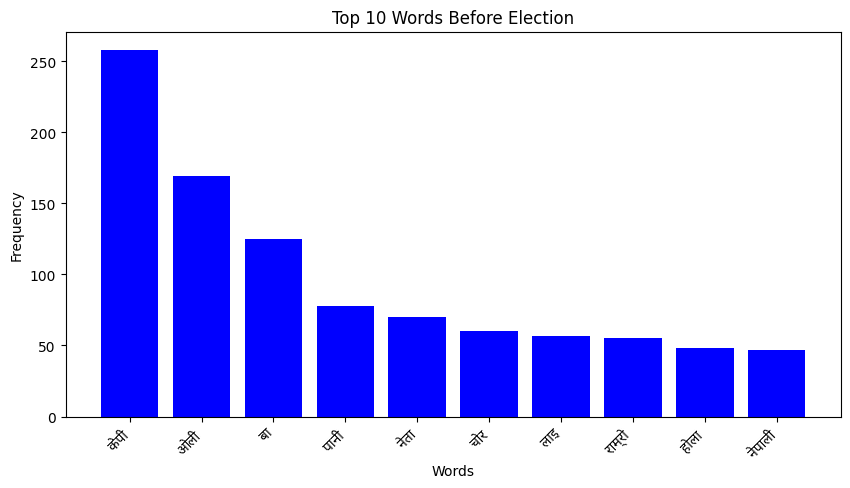

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 98 (b) missing from font(s) Noto Sans Devanagari.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 114 (r) missing from font(s) Noto Sans Devanagari.
  fig.canvas.print_figure(bytes_io, **kw)


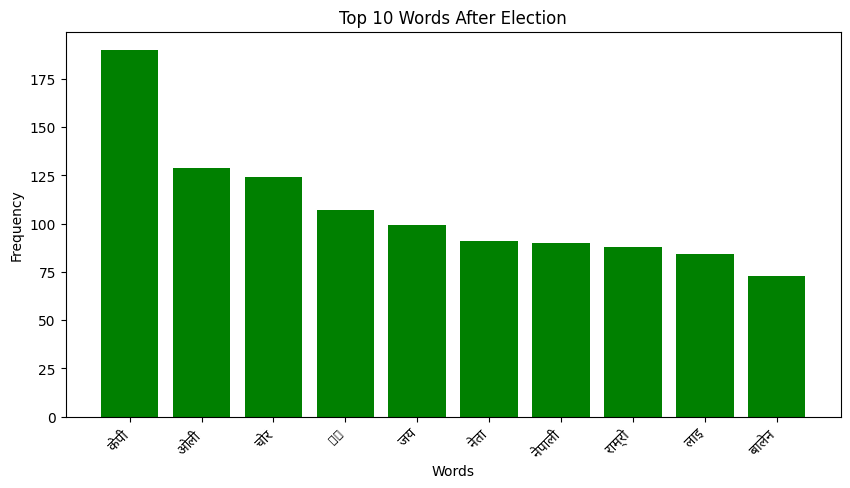

In [11]:
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import os
import requests

# Load Devanagari-compatible font dynamically
font_url = "https://github.com/googlefonts/noto-fonts/raw/main/hinted/ttf/NotoSansDevanagari/NotoSansDevanagari-Regular.ttf"
font_path = "NotoSansDevanagari-Regular.ttf"

# Download font if not already present
if not os.path.exists(font_path):
    response = requests.get(font_url)
    with open(font_path, 'wb') as f:
        f.write(response.content)

# Load the font
deva_font = fm.FontProperties(fname=font_path)



# Recalculate word frequencies
before_election_words = [word for text in before_election_df['cleaned_text'] for word in text]
after_election_words = [word for text in after_election_df['cleaned_text'] for word in text]

before_election_word_counts = Counter(before_election_words)
after_election_word_counts = Counter(after_election_words)

# Get the top 10 most common words
top_before_words = before_election_word_counts.most_common(10)
top_after_words = after_election_word_counts.most_common(10)

# Convert to DataFrame for easy visualization
before_top_words_df = pd.DataFrame(top_before_words, columns=['Word', 'Count'])
after_top_words_df = pd.DataFrame(top_after_words, columns=['Word', 'Count'])

# Print the top words
print("Top 10 Words Before Election:")
print(before_top_words_df)

print("\nTop 10 Words After Election:")
print(after_top_words_df)

# Plot the top words before election
plt.figure(figsize=(10, 5))
plt.bar(before_top_words_df['Word'], before_top_words_df['Count'], color='blue')
plt.title('Top 10 Words Before Election')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right', fontproperties=deva_font)
plt.show()

# Plot the top words after election
plt.figure(figsize=(10, 5))
plt.bar(after_top_words_df['Word'], after_top_words_df['Count'], color='green')
plt.title('Top 10 Words After Election')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right', fontproperties=deva_font)
plt.show()
